In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
df.drop(columns=['gross margin percentage'], inplace=True)

In [6]:
df.isna().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
cogs             0
gross income     0
Rating           0
dtype: int64

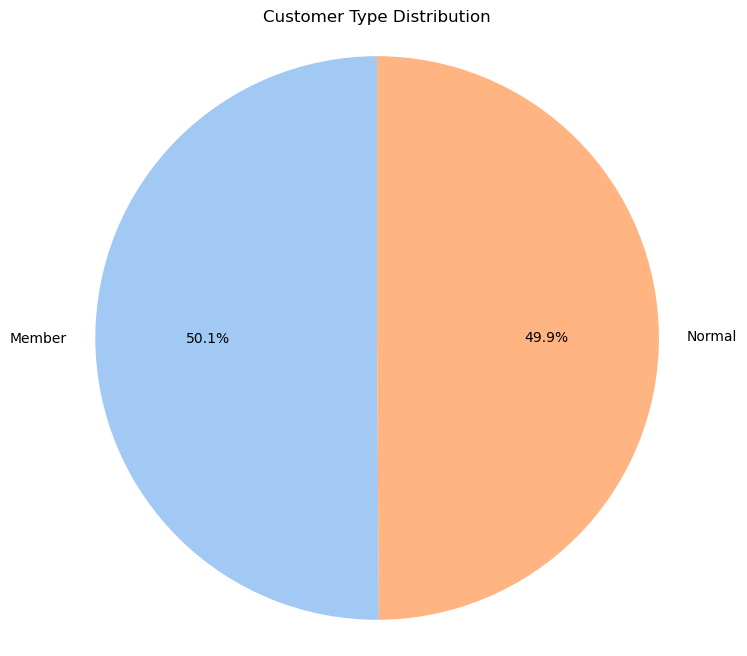

In [7]:
# Function to create a pie chart
def plot_pie(df):
    # Using 'Customer type' for pie chart
    customer_type_counts = df['Customer type'].value_counts()
    
    plt.figure(figsize=(8, 8))
    plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    plt.title('Customer Type Distribution')
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
    plt.show()

plot_pie(df)


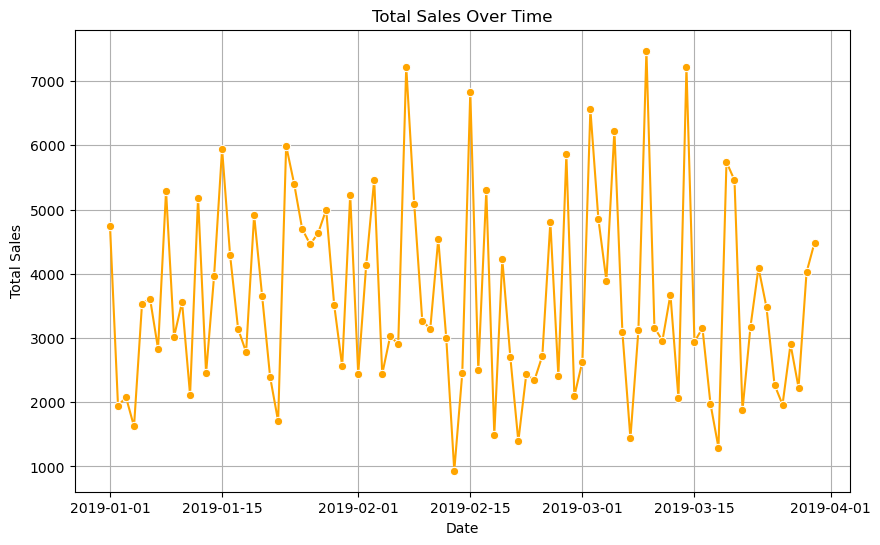

In [8]:
# Function to create a line plot
def plot_line(df):
    # Assuming 'Date' is in a suitable format, we can group by 'Date' and calculate the total sales
    df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format
    df['Total'] = df['Unit price'] * df['Quantity'] + df['Tax 5%']  # Calculate Total if not already present
    
    total_sales_by_date = df.groupby('Date')['Total'].sum()
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=total_sales_by_date.index, y=total_sales_by_date.values, marker='o', color='orange')
    plt.title('Total Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.grid()
    plt.show()

plot_line(df)


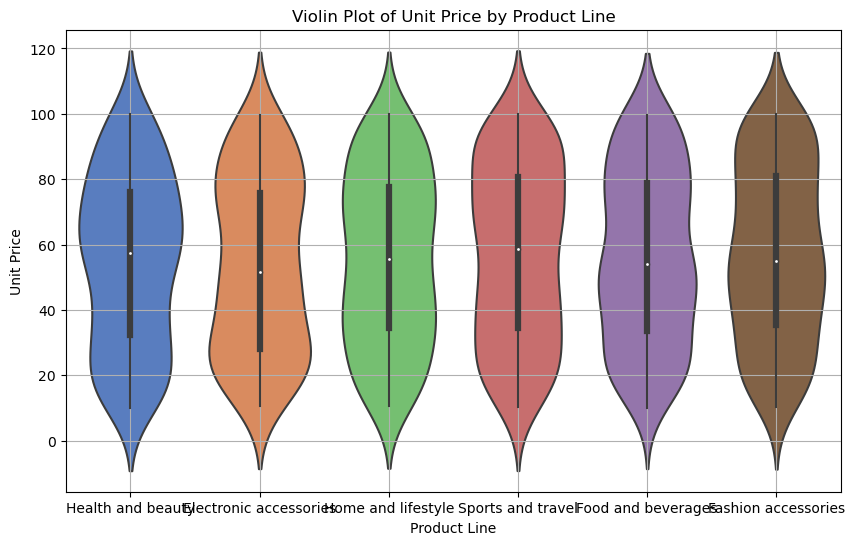

In [9]:
# Function to create a violin plot
def plot_violin(df):
    # Let's use 'Product line' and 'Unit price' for the violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Product line', y='Unit price', data=df, palette='muted')
    plt.title('Violin Plot of Unit Price by Product Line')
    plt.xlabel('Product Line')
    plt.ylabel('Unit Price')
    plt.grid()
    plt.show()

# Call the function to generate the violin plot
plot_violin(df)


In [10]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())




Descriptive Statistics:
        Unit price     Quantity       Tax 5%        Total  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     55.672130     5.510000    15.379369   322.966749   
min      10.080000     1.000000     0.508500    10.678500   
25%      32.875000     3.000000     5.924875   124.422375   
50%      55.230000     5.000000    12.088000   253.848000   
75%      77.935000     8.000000    22.445250   471.350250   
max      99.960000    10.000000    49.650000  1042.650000   
std      26.494628     2.923431    11.708825   245.885335   

                             Date        cogs  gross income      Rating  
count                        1000  1000.00000   1000.000000  1000.00000  
mean   2019-02-14 00:05:45.600000   307.58738     15.379369     6.97270  
min           2019-01-01 00:00:00    10.17000      0.508500     4.00000  
25%           2019-01-24 00:00:00   118.49750      5.924875     5.50000  
50%           2019-02-13 00:00:00   241.76000     12.08

In [11]:
# Compute the correlation matrix
numeric_cols = df.select_dtypes(include='number') 
correlation_matrix = numeric_cols.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
              Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price      1.000000  0.010778  0.633962  0.633962  0.633962   
Quantity        0.010778  1.000000  0.705510  0.705510  0.705510   
Tax 5%          0.633962  0.705510  1.000000  1.000000  1.000000   
Total           0.633962  0.705510  1.000000  1.000000  1.000000   
cogs            0.633962  0.705510  1.000000  1.000000  1.000000   
gross income    0.633962  0.705510  1.000000  1.000000  1.000000   
Rating         -0.008778 -0.015815 -0.036442 -0.036442 -0.036442   

              gross income    Rating  
Unit price        0.633962 -0.008778  
Quantity          0.705510 -0.015815  
Tax 5%            1.000000 -0.036442  
Total             1.000000 -0.036442  
cogs              1.000000 -0.036442  
gross income      1.000000 -0.036442  
Rating           -0.036442  1.000000  
